## K-means
The objective of K-means is simply to group *similar* data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset. A cluster refers to a collection of data points aggregated together because of certain similarities. You’ll define a target number k, which refers to the number of centroids you need in the dataset. This is how the algorithm works:
- It starts by selecting randomly allocated centriods, which are used as the beginning points of every cluster, and then performs iterative calculations to optimize the position of the centriods.
- This process continues until: 
    - The centroids have stabilized — there is no change in their values because the clustering has been successful.
    - The defined number of iterations has been achieved.

For accurate clustering results K-means expects the data to adhere to the following assumptions:
- Equal average values of variables
- Equal standard deviation of variables
- Symmetrical distribution of variables

It is our duty to ensure that these assumptions have been met during the pre-processing stage. We tackled these assumptions in the data pre-processing stage, so we are good to continue with our clustering task. 

The last thing we need before we get the clusters is to choose the number of clusters. The next section deals with methods for choosing the right number of clusters for our dataset.

## Deciding on the K-value
There are several methods for deciding the correct k-value:
- Visual Methods: elbow criteria
- Mathematical methods: silhouette coefficient
- Experimentation and interpretation

We will be using the elbow method to decide the value of K to use. The **elbow criterion method, plots the number of clusters against within-cluster sum-of-squared-errors (SSE)** - *which is the sum of squared distances from every data point to their cluster center.*  We then look at the chart to find where the decrease in SSE slows down and becomes somewhat marginal, that point looks like an elbow and suggests the point of diminishing returns by increasing the number of clusters. This point represents the optimal number of clusters from a sum-of-squared-errors perspective. However, we should choose several options around the elbow to test what makes the most sense. 

In [24]:
# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# get the data
data = pd.read_csv('../data/raw/airbnb_final.csv')
data.head()

,price_category,name,id,price,adjusted_price,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,neighbourhood_cleansed,...,40,41,42,43,44,45,46,47,48,49
0,high,Skylit Midtown Castle,2595,225.0,225.000000,1,0.0,1.0,Manhattan,Midtown,...,0.576904,0.466956,0.331311,0.261779,-0.330193,1.620287,0.867739,-0.798060,-0.576860,-0.254925
1,medium,THE VILLAGE OF HARLEM....NEW YORK !,3647,150.0,50.000000,3,1.0,1.0,Manhattan,Harlem,...,-0.252328,0.226731,0.269839,-0.211928,0.147831,1.354929,0.801862,-0.292820,-0.804985,-0.202175
2,low,Entire Apt: Spacious Studio/Loft by central park,5022,80.0,8.000000,10,1.0,1.0,Manhattan,East Harlem,...,0.193168,0.068044,0.015844,0.197295,-0.167786,1.117572,0.749340,0.109282,-0.870940,-0.278948
3,medium,Large Cozy 1 BR Apartment In Midtown East,5099,200.0,66.666667,3,1.0,1.0,Manhattan,Murray Hill,...,0.416250,-0.057388,0.073780,0.143102,0.198163,1.440193,0.641507,-0.021390,-0.912154,-0.285108
4,low,BlissArtsSpace!,5121,60.0,1.333333,45,1.0,1.0,Brooklyn,Bedford-Stuyvesant,...,-0.214280,-0.095810,0.224063,0.083689,-0.192449,0.410582,0.017357,0.246550,0.796558,0.307420


In [25]:
# gather all the PCA components
# rename the PC columns
pc_col_names = ["pc_" + item for item in list(data.columns[10:])]

# extract the 50 principal components
pc_data = data.iloc[:, 10:]

# rename the columns
pc_data.columns = pc_col_names

We are going to use the 50 principal components that we constructed in this post: [NYC Airbnb PCA](https://shravan-kuchkula.github.io/nyc-airbnb-pca/) .Displayed below is the shape and head of these components.

In [26]:
pc_data.shape

(45605, 50)

In [27]:
pc_data.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_40,pc_41,pc_42,pc_43,pc_44,pc_45,pc_46,pc_47,pc_48,pc_49
0,2.658552,-1.455526,0.699093,-0.553412,-0.125384,-0.654187,-0.044713,-0.001357,0.108582,1.333186,...,0.576904,0.466956,0.331311,0.261779,-0.330193,1.620287,0.867739,-0.798060,-0.576860,-0.254925
1,-1.644174,-0.715321,1.097099,0.893833,0.399013,-0.139751,-1.183842,-1.132572,0.996817,0.151908,...,-0.252328,0.226731,0.269839,-0.211928,0.147831,1.354929,0.801862,-0.292820,-0.804985,-0.202175
2,-1.012114,-1.718006,-0.320889,-0.356113,0.113797,0.392780,-0.399569,-0.819086,-0.133456,-0.200684,...,0.193168,0.068044,0.015844,0.197295,-0.167786,1.117572,0.749340,0.109282,-0.870940,-0.278948
3,0.067402,-0.520919,-0.263865,0.353879,-0.907122,-0.906052,-1.158888,-0.624668,-0.071571,0.780228,...,0.416250,-0.057388,0.073780,0.143102,0.198163,1.440193,0.641507,-0.021390,-0.912154,-0.285108
4,-1.666907,1.296202,0.520533,0.659033,1.262238,-0.516450,-0.827510,-0.678685,0.010626,0.180606,...,-0.214280,-0.095810,0.224063,0.083689,-0.192449,0.410582,0.017357,0.246550,0.796558,0.307420


### Fit K-means for K=1 to K=10 clusters

In [28]:
# Fit Kmeans and calculate SSE for each k value
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pc_data)
    sse[k] = kmeans.inertia_ # sum of squared distances to the closest cluster centers

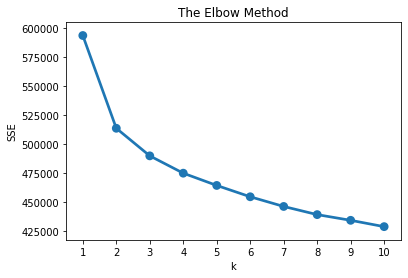

In [29]:
# plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Using K=3
Looking at the above Elbow plot, we can see that for K-values of 2 and 3, there is a sharp decrease in SSE. I chose the value of K=3 instead of K=2, since I broke down the airbnb listings into 3 price categories: high, medium, low, and I want to see if K-means clustering picked out the listings by grouping them as per their price range.

In [30]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(pc_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [31]:
# get the labels
cluster_labels = kmeans.labels_

# assign these clusters back into the dataframe
pc_data_k3 = pc_data.assign(cluster=cluster_labels)

# display the shape
pc_data_k3.shape

(45605, 51)

In [32]:
pc_data_k3.cluster.value_counts()

2    16801
0    14767
1    14037
Name: cluster, dtype: int64

## Combine cluster labels with the main dataset for visualization

In [36]:
other_col_names = list(data.columns[:10])
other_col_names

['price_category',
 'name',
 'id',
 'price',
 'adjusted_price',
 'minimum_nights',
 'bedrooms',
 'bathrooms',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed']

In [38]:
k_means_visual = data[other_col_names]
k_means_visual.shape

(45605, 10)

In [41]:
k_means_visual = k_means_visual.assign(cluster=cluster_labels)
k_means_visual.head()

,price_category,name,id,price,adjusted_price,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,neighbourhood_cleansed,cluster
0,high,Skylit Midtown Castle,2595,225.0,225.000000,1,0.0,1.0,Manhattan,Midtown,1
1,medium,THE VILLAGE OF HARLEM....NEW YORK !,3647,150.0,50.000000,3,1.0,1.0,Manhattan,Harlem,2
2,low,Entire Apt: Spacious Studio/Loft by central park,5022,80.0,8.000000,10,1.0,1.0,Manhattan,East Harlem,2
3,medium,Large Cozy 1 BR Apartment In Midtown East,5099,200.0,66.666667,3,1.0,1.0,Manhattan,Murray Hill,2
4,low,BlissArtsSpace!,5121,60.0,1.333333,45,1.0,1.0,Brooklyn,Bedford-Stuyvesant,0


In [42]:
k_means_visual.shape

(45605, 11)

## Save and upload to S3

In [43]:
k_means_visual.to_csv('k_means_visual.csv', index=False)

In [45]:
import configparser
config = configparser.ConfigParser()
config.read_file(open('/Users/shravan/projects/interview-prep/credentials.cfg'))

KEY = config.get('AWS','KEY')
SECRET = config.get('AWS','SECRET')

In [46]:
import boto3

# Generate the boto3 client for interacting with S3
s3 = boto3.client('s3', region_name='us-east-1', 
                        # Set up AWS credentials 
                        aws_access_key_id=KEY, 
                        aws_secret_access_key=SECRET)

In [47]:
s3.upload_file(Bucket='skuchkula-sagemaker-airbnb',
              Filename='k_means_visual.csv',
              Key='feature/k_means_visual.csv')